Import Library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd

Baca dataset, sumber dataset (https://www.kaggle.com/datasets)

In [3]:
buah = pd.read_table("fruit_data_with_colors.txt")
buah.head(30)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


Cek Isi Dataset

In [4]:
buah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


Cek Hubungan label dan nama

In [5]:
label_mapping = dict(zip(buah.fruit_label.unique(),buah.fruit_name.unique()))
label_mapping

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [6]:
buah['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

Missing Value

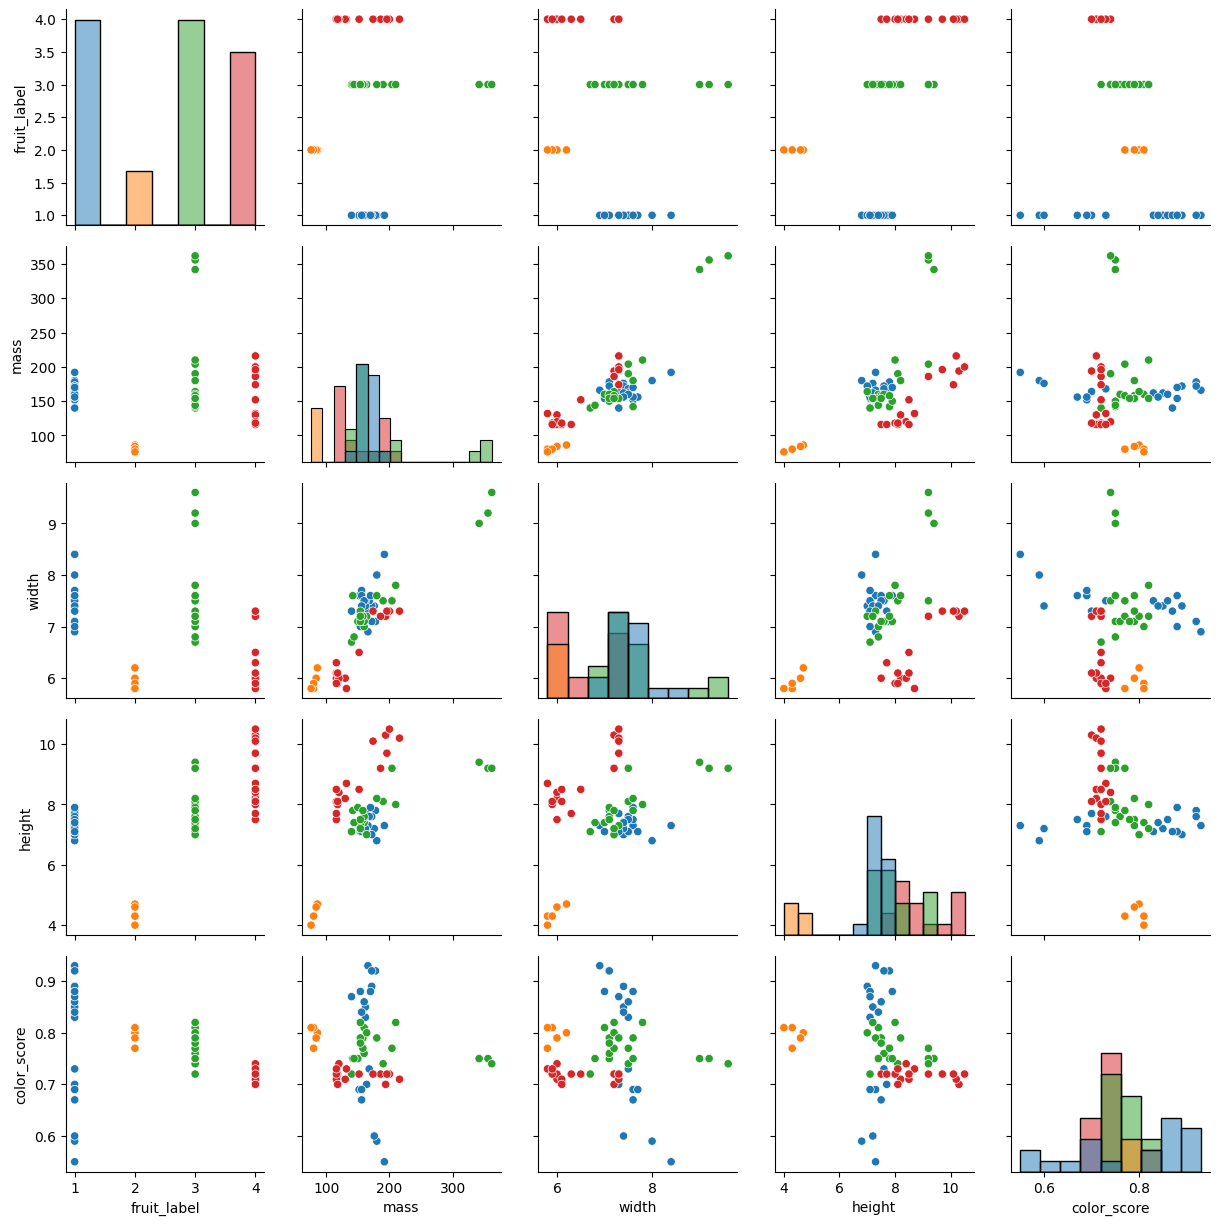

In [7]:
import seaborn as sns
g = sns.PairGrid(buah,hue= "fruit_name")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

Checking NaN Values

In [8]:
buah.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

Membuang data yang bersifat text/tidak dibutuhkan(fruit_name fruit_subtype)

In [9]:
buah = buah.drop(["fruit_name","fruit_subtype"],axis=1)
buah.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


Melakukan scaling untukl meningkatkan performa

In [10]:
x = buah[["mass","width","height","color_score"]]
y = buah['fruit_label']

In [11]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.40559441, 0.68421053, 0.50769231, 0.        ],
       [0.36363636, 0.57894737, 0.43076923, 0.10526316],
       [0.34965035, 0.42105263, 0.49230769, 0.13157895],
       [0.03496503, 0.10526316, 0.10769231, 0.65789474],
       [0.02797203, 0.05263158, 0.09230769, 0.63157895],
       [0.01398601, 0.        , 0.04615385, 0.57894737],
       [0.01398601, 0.02631579, 0.04615385, 0.68421053],
       [0.        , 0.        , 0.        , 0.68421053],
       [0.35664336, 0.34210526, 0.58461538, 0.97368421],
       [0.33566434, 0.42105263, 0.46153846, 0.89473684],
       [0.31468531, 0.28947368, 0.50769231, 1.        ],
       [0.33566434, 0.34210526, 0.55384615, 0.97368421],
       [0.27272727, 0.31578947, 0.47692308, 0.86842105],
       [0.30769231, 0.39473684, 0.56923077, 0.39473684],
       [0.26573427, 0.47368421, 0.50769231, 0.36842105],
       [0.27972028, 0.5       , 0.47692308, 0.36842105],
       [0.27972028, 0.47368421, 0.53846154, 0.31578947],
       [0.32167832, 0.44736842,

Membuktikan pengaruh scaling pada data untuk meningkatkan performa

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test= train_test_split(x,y,random_state=0)
x_train_scaled,x_test_scaled, y_train_scaled, y_test_scaled= train_test_split(x_scaled,y, random_state=0)

Model tanpa scaling

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
knn1.score(x_test,y_test)

0.5333333333333333

Model dengan scaling

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=3).fit(x_train_scaled,y_train) #model dengan scaling
knn2.score(x_test_scaled,y_test)

0.9333333333333333

K terbaik

In [15]:
K= np.arange(2,30)

scores =[]

for k in K:
  model = KNeighborsClassifier(n_neighbors=k).fit(x_train_scaled,y_train_scaled)
  score = model.score(x_test_scaled,y_test_scaled)
  scores.append(score)

Print scores

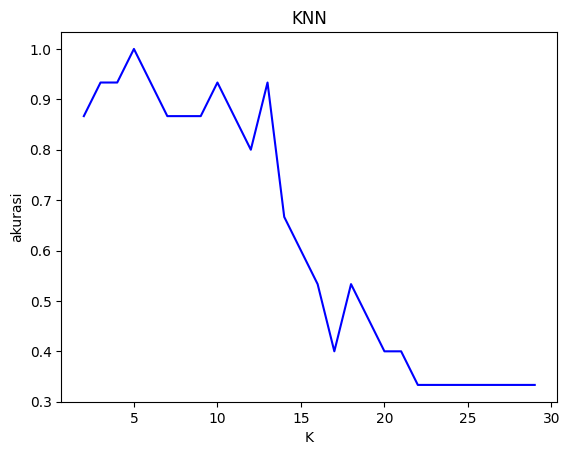

In [16]:
import matplotlib.pyplot as plt
plt.plot(K,scores, c= "blue")
plt.title('KNN')
plt.ylabel("akurasi")
plt.xlabel("K")
plt.show()